## Multinomial Naive Bayes classification

Lendo e separando os dados

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
#Load dataset
names = ['''Wife's age''','''Wife's education''','''Husband's education''', 'Number of children ever born', '''Wife's religion''','''Wife's now working?''', '''Husband's occupation''','Standard-of-living index', 'Media exposure', 'Contraceptive method used']

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data', names=names)
data = data.sample(frac=1) # Get random data
data.head()
#

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
1143,32,4,4,3,1,1,1,4,0,1
1362,29,1,2,1,1,1,3,3,0,3
1094,38,1,2,6,1,1,2,1,1,1
821,26,3,4,2,1,1,3,3,0,3
541,26,4,4,1,1,0,1,3,0,2


*****************************************************
            SEPARANDO OS ATRIBUTOS E CLASSE
*****************************************************


In [2]:
x_values = data[['''Wife's age''','''Wife's education''','''Husband's education''', 'Number of children ever born', '''Wife's religion''','''Wife's now working?''', '''Husband's occupation''','Standard-of-living index', 'Media exposure']]
y_values= data[['Contraceptive method used']]
x_values.head()


,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure
1143,32,4,4,3,1,1,1,4,0
1362,29,1,2,1,1,1,3,3,0
1094,38,1,2,6,1,1,2,1,1
821,26,3,4,2,1,1,3,3,0
541,26,4,4,1,1,0,1,3,0


**********************************************************************
UTILIZA-SE O METODO REPLACE PRA SUBSTITUIR A STRING COMO INDICADO EM MAPPING
**********************************************************************

In [3]:

mapping = {1: 0, 2: 1, 3: 2}
#mplist = []

#for key in mapping:
#    mplist.append(key)
print('\n------------After mapping------------\n')
y_values = y_values.replace(mapping)
y_values.head()
#y_values.describe()



------------After mapping------------



,Contraceptive method used
1143,0
1362,2
1094,0
821,2
541,1


Dividindo o conjunto de dados em treino e teste

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_values.values, y_values.values, test_size = 0.10)

In [18]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

y_train = np.array([a for a in y_train])
#print(y_train)

#invertendo o y_train, pra resultar em apenas uma coluna

y_train = y_train.ravel() 
y_train


array([0, 1, 2, ..., 1, 1, 1])

**********************************************************************
TREINANDO O MODELO
**********************************************************************

In [74]:
#Create a Gaussian Classifier
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

print(y_train.shape)
y_train = y_train.ravel()
print(y_train.shape)


#gnb= MultinomialNB()
#gnb = BernoulliNB()
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)

(1325,)
(1325,)


GaussianNB(priors=None, var_smoothing=1e-09)

Predizendo

In [75]:
#Predict the response for test dataset
y_pred = gnb.predict(X_test)
y_pred

array([0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1,
       1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1,
       1, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2,
       1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2])

In [76]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Mean Squared error: ",metrics.mean_squared_error(y_test, y_pred))
print("Squared Log: ",metrics.mean_squared_log_error(y_test, y_pred))


Accuracy: 0.4527027027027027
Mean Squared error:  1.114864864864865
Squared Log:  0.347008811755345


PLOTAGEM DOS DADOS

precision    recall  f1-score   support

           0       0.57      0.33      0.42        61
           1       0.42      0.63      0.50        43
           2       0.41      0.45      0.43        44

    accuracy                           0.45       148
   macro avg       0.47      0.47      0.45       148
weighted avg       0.48      0.45      0.45       148



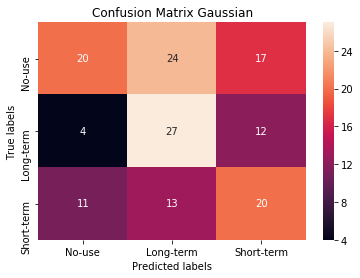

In [77]:
# linear
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Gaussian'); 
ax.xaxis.set_ticklabels(['No-use', 'Long-term', 'Short-term']); ax.yaxis.set_ticklabels(['No-use', 'Long-term', 'Short-term']);

print(classification_report(y_test,y_pred))

https://scikit-learn.org/stable/modules/naive_bayes.html